<a href="https://colab.research.google.com/github/karan11111111111/AIL-3073-/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

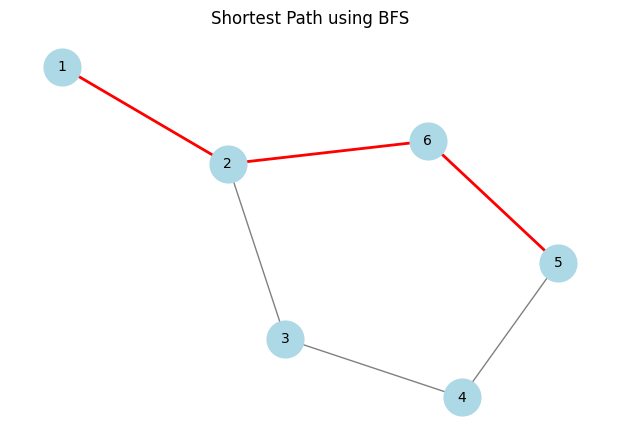

BFS Path: [1, 2, 6, 5], Nodes Explored: 6


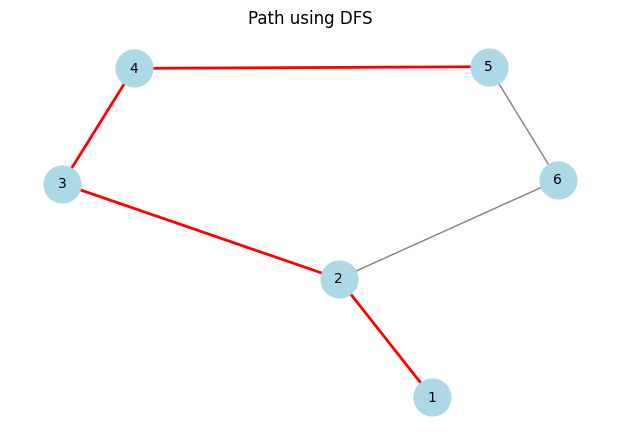

DFS Path: [1, 2, 3, 4, 5], Nodes Explored: 5


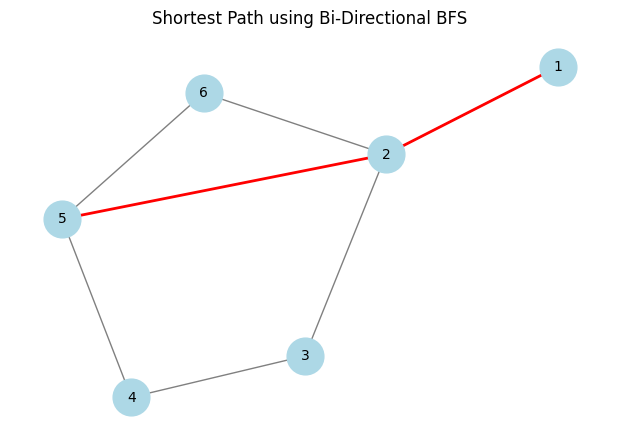

Bi-Directional BFS Path: [1, 2, 5], Nodes Explored: 2

Comparison:
BFS explored 6 nodes.
DFS explored 5 nodes.
Bi-Directional BFS explored 2 nodes.


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Generate the city map as a smaller graph
def create_city_map():
    G = nx.Graph()
    edges = [
        (1, 2), (2, 3), (3, 4), (4, 5),  # Linear connections
        (2, 6), (6, 5)                  # Additional shortcuts
    ]
    G.add_edges_from(edges)
    return G

# Standard BFS Implementation
def bfs(graph, start, goal):
    queue = deque([(start, [start])])
    visited = set()
    nodes_explored = 0

    while queue:
        node, path = queue.popleft()
        nodes_explored += 1

        if node == goal:
            return path, nodes_explored

        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))

    return None, nodes_explored

# Standard DFS Implementation
def dfs(graph, start, goal, visited=None, path=None, nodes_explored=0):
    if visited is None:
        visited = set()
    if path is None:
        path = []

    visited.add(start)
    path.append(start)
    nodes_explored += 1

    if start == goal:
        return path, nodes_explored

    for neighbor in graph[start]:
        if neighbor not in visited:
            result = dfs(graph, neighbor, goal, visited, path[:], nodes_explored)
            if result[0]:
                return result

    return None, nodes_explored

# Bi-Directional BFS Implementation
def bidirectional_bfs(graph, start, goal):
    if start == goal:
        return [start], 1

    front_visited = {start}
    back_visited = {goal}
    front_queue = deque([(start, [start])])
    back_queue = deque([(goal, [goal])])

    nodes_explored = 0

    while front_queue and back_queue:
        nodes_explored += 1

        # Explore from the front
        front_node, front_path = front_queue.popleft()
        for neighbor in graph[front_node]:
            if neighbor in front_visited:
                continue
            if neighbor in back_visited:
                # Connect the two paths
                back_path = next(path for node, path in back_queue if node == neighbor)
                return front_path + back_path[::-1][1:], nodes_explored
            front_visited.add(neighbor)
            front_queue.append((neighbor, front_path + [neighbor]))

        # Explore from the back
        back_node, back_path = back_queue.popleft()
        for neighbor in graph[back_node]:
            if neighbor in back_visited:
                continue
            if neighbor in front_visited:
                # Connect the two paths
                front_path = next(path for node, path in front_queue if node == neighbor)
                return front_path + back_path[::-1][1:], nodes_explored
            back_visited.add(neighbor)
            back_queue.append((neighbor, back_path + [neighbor]))

    return None, nodes_explored

# Visualization Function
def visualize_search(graph, path, title):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(6, 4))
    nx.draw(graph, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=700, font_size=10)

    if path:
        edges_in_path = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(graph, pos, edgelist=edges_in_path, edge_color="red", width=2)

    plt.title(title)
    plt.show()

# Main Function
def main():
    G = create_city_map()
    start, goal = 1, 5

    # BFS
    bfs_path, bfs_nodes = bfs(G, start, goal)
    visualize_search(G, bfs_path, "Shortest Path using BFS")
    print(f"BFS Path: {bfs_path}, Nodes Explored: {bfs_nodes}")

    # DFS
    dfs_path, dfs_nodes = dfs(G, start, goal)
    visualize_search(G, dfs_path, "Path using DFS")
    print(f"DFS Path: {dfs_path}, Nodes Explored: {dfs_nodes}")

    # Bi-Directional BFS
    bidir_path, bidir_nodes = bidirectional_bfs(G, start, goal)
    visualize_search(G, bidir_path, "Shortest Path using Bi-Directional BFS")
    print(f"Bi-Directional BFS Path: {bidir_path}, Nodes Explored: {bidir_nodes}")

    # Comparison
    print("\nComparison:")
    print(f"BFS explored {bfs_nodes} nodes.")
    print(f"DFS explored {dfs_nodes} nodes.")
    print(f"Bi-Directional BFS explored {bidir_nodes} nodes.")

if __name__ == "__main__":
    main()
